In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import env
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from pydataset import data

In [2]:
from env import host, user, password

In [3]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
<ul>
<li>print the first 3 rows
<li>print the number of rows and columns (shape)
<li>print the column names
<li>print the data type of each column
<li>print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?</ul>

In [4]:
iris = pd.read_sql('SELECT * FROM measurements JOIN species as species_name on species_id', get_connection('iris_db'))



OperationalError: (pymysql.err.OperationalError) (1052, "Column 'species_id' in on clause is ambiguous")
[SQL: SELECT * FROM measurements JOIN species as species_name on species_id]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [ ]:
iris.to_csv('iris.csv')

In [ ]:
def get_iris_data():
    filename = "iris.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM measuresments', get_connection('iris_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_file(filename)

        # Return the dataframe to the calling code
        return df  

In [ ]:
df_iris = pd.read_csv('iris.csv', index_col=0)
df_iris.head(3)

In [ ]:
df_iris.info()

In [ ]:
for col in df_iris.columns: 
    print(col) 

In [ ]:
df_iris.dtypes
#based off the data types i would convert the measurement and species id from an integer to a float

Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.
<ol>
<li> assign the first 100 rows to a new dataframe, df_excel_sample
<li>print the number of rows of your original dataframe
<li>print the first 5 column names
<li>print the column names that have a data type of object
<li>compute the range for each of the numeric variables.
    </ol>

In [ ]:
excel_df = pd.read_csv('telco.csv', index_col=0)
excel_df.head(100)

In [ ]:
titanic=pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

In [ ]:
titanic.to_csv('titanic.csv')

In [ ]:
def get_titanic_data():
    filename = "titanic.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_file(filename)

        # Return the dataframe to the calling code
        return df  

Iris Data
<ol style="list-style-type:lower-alpha">
<li>Use the function defined in acquire.py to load the iris data.</li>
<li>Drop the species_id and measurement_id columns.</li>
<li>Rename the species_name column to just species. </li>
<li>Create dummy variables of the species name.</li>
<li>Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.</li> </ol>

In [ ]:
# Use the function defined in acquire.py to load the iris data.
import acquire
iris = acquire.get_iris_data()
iris.head()

In [ ]:
# Drop the species_id and measurement_id columns.
cols_to_drop = ['species_id', 'measurement_id']
iris = iris.drop(columns=cols_to_drop)

In [ ]:
iris.columns

In [ ]:
# Rename the species_name column to just species.
iris= iris.rename(columns={'species_name': 'species'})
iris=iris.rename(columns={'species_id.1': 'speciesid'})
iris

In [ ]:
# Create dummy variables of the species name.
iris.species.value_counts()
iris_dummies = pd.get_dummies(iris[['species']], drop_first=[True, True])
iris = pd.concat([iris, iris_dummies], axis=1)
iris

Titanic Data
<ol style="list-style-type:lower-alpha", font= "rockwell">
<li>Use the function you defined in acquire.py to load the titanic data set.</li>
<li>Handle the missing values in the embark_town and embarked columns.</li>
<li>Remove the deck column.</li>
<li>Create a dummy variable of the embarked column.</li>
<li>Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?</li>
<li>Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.</li>
<li>Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.</li> </ol>

In [ ]:
titanic= acquire.get_titanic_data()
titanic.head(1)

In [ ]:
def drop_cols_with_50pct_null(titanic):
    # create series with percent missing
    missing_vals = titanic.isnull().sum()/len(df)*100
    # identify the columns to drop
    cols_to_drop = [missing_vals[missing_vals>50].index[0]]
    df = titanic.drop(columns=cols_to_drop)
    return titanic
#type(missing_vals)

In [ ]:
titanic.isnull().sum()

Explore Exercises
<ol>
Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

<li>Split your data into train, test, and validate samples.</li> 

<li>Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization. </li> 

<li>Create 4 subplots (2 rows x 2 columns) of scatterplots.
<ul>
<li> sepal_length x sepal_width</li> 
<li> petal_length x petal_width</li> 
<li> sepal_area x petal_area</li> 
<li> sepal_length x petal_length</li> 
<li> What are your takeaways?</li> 
    </ul>
<li> Create a heatmap of each variable layering correlation coefficient on top.</li> 

<li> Create a scatter matrix visualizing the interaction of each variable </li> 

<li> Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.</li> 

<li> Make sure to include a null hypothesis, alternative hypothesis, results, and summary.</li> 

<li> What is your takeaway from this statistical testing?</li> 

<li> Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.</li> 

In [12]:
plt.rc ('font', size =14)
iris= pd.read_csv("iris.csv")
iris= iris.assign(sepal_area=(iris.sepal_width * iris. sepal_length))
iris= iris.assign(petal_area=(iris.petal_width * iris. petal_length))
iris= iris.assign(total_area=(iris.sepal_area + iris. petal_area))
iris= iris.drop(columns=['species_id', 'species_id.1', 'measurement_id'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area,total_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28,18.13
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28,14.98
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26,15.30
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30,14.56
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28,18.28


In [7]:
train, test = train_test_split(iris, test_size=.2, random_state=123, stratify=iris.species_name)
train, validate = train_test_split(iris, test_size=.3, random_state=123, stratify=iris.species_name)
print('overall shape', iris.shape)
print('train', train.shape)
print('validate', validate.shape)
print('test', test.shape)

overall shape (150, 8)
train (105, 8)
validate (45, 8)
test (30, 8)


In [10]:
iris_melted=train.melt(id_vars=['species_name'])

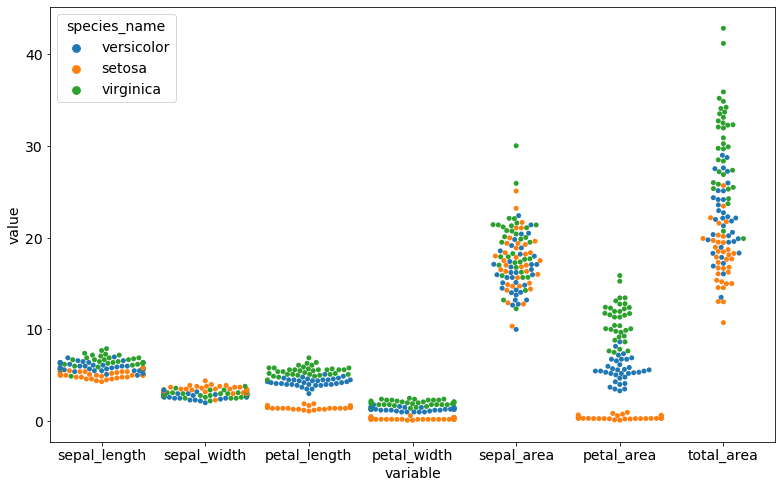

In [16]:
plt.figure(figsize=(13,8))
sns.swarmplot(data= iris_melted, x= 'variable', y='value', hue='species_name')

In [ ]:
sns.swarmplot(x='species_name', y='petal_area', data=iris)

In [ ]:
sns.swarmplot(x='species_name', y='sepal_area', data=iris)

In [ ]:
sns.swarmplot(x='species_name', y='total_area', data=iris)

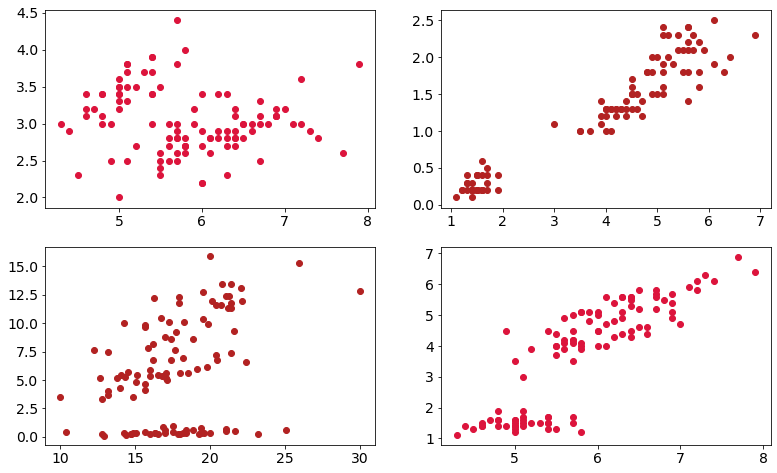

In [27]:
plt.figure(figsize=(13,8))

plt.subplot(221)
plt.scatter (train.sepal_length, train. sepal_width, color="crimson")
plt.subplot(222)
plt.scatter (train.petal_length, train.petal_width, color="firebrick")
plt.subplot(223)
plt.scatter(train.sepal_area, train.petal_area, color="firebrick")
plt.subplot(224)
plt.scatter(train.sepal_length, train.petal_length, color="crimson")

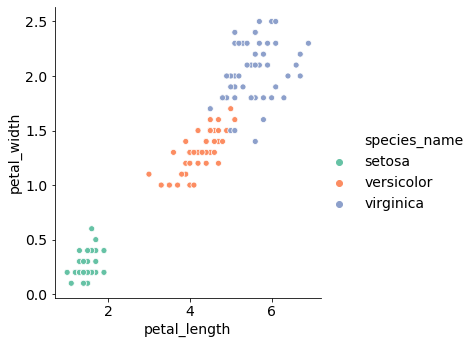

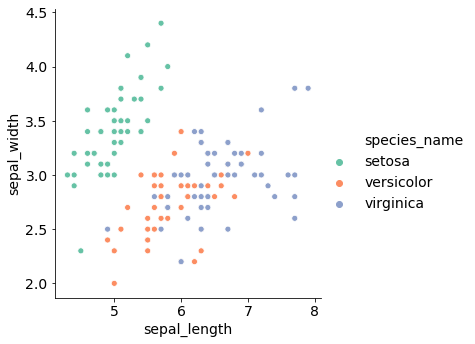

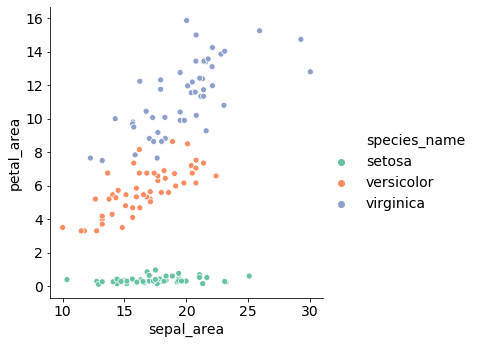

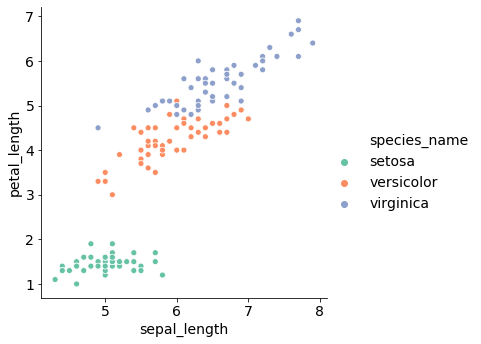

In [34]:
sns.set_palette("Set2")
sns.relplot(x='petal_length', y='petal_width', hue="species_name",data=iris)
sns.relplot(x='sepal_length', y='sepal_width', hue="species_name",data=iris)
sns.relplot(x='sepal_area', y='petal_area', hue="species_name",data=iris)
sns.relplot(x='sepal_length', y='petal_length', hue="species_name",data=iris)

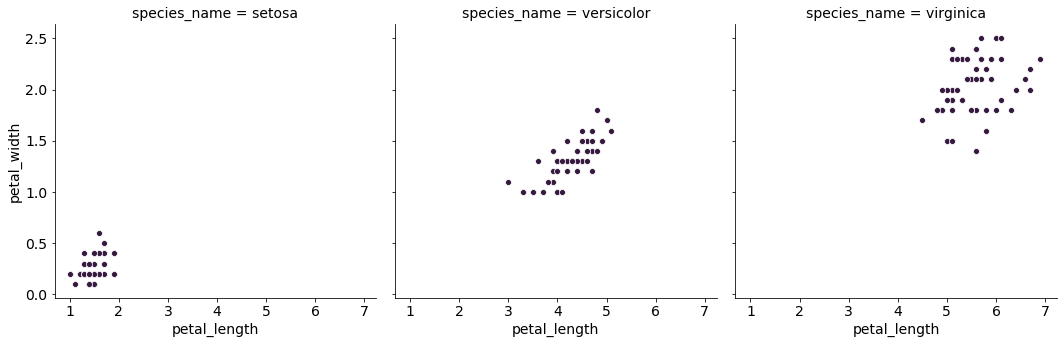

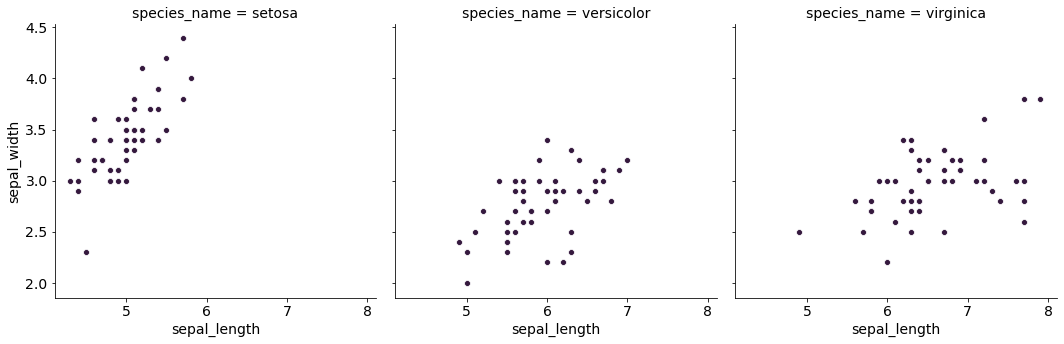

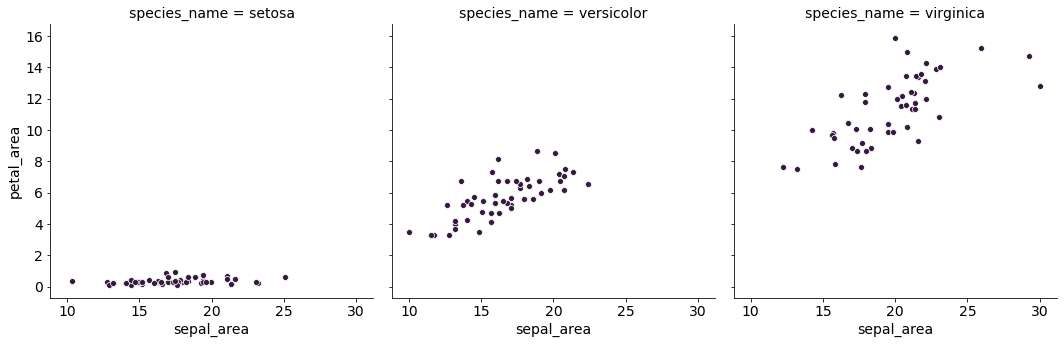

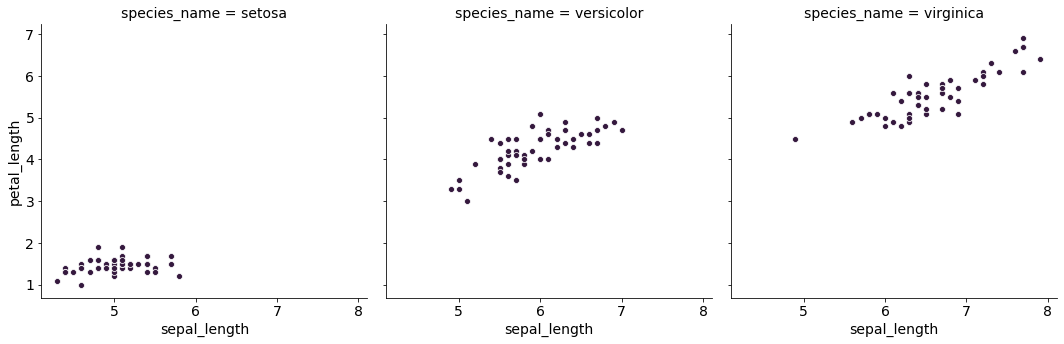

In [45]:
sns.set_palette("rocket")
sns.relplot(x='petal_length', y='petal_width', col='species_name', data=iris)
sns.relplot(x='sepal_length', y='sepal_width', col='species_name', data=iris)
sns.relplot(x='sepal_area', y='petal_area', col='species_name', data=iris)
sns.relplot(x='sepal_length', y='petal_length', col='species_name', data=iris)

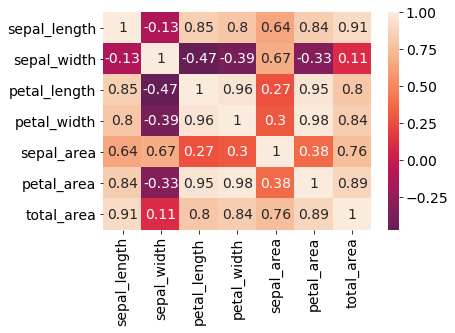

In [43]:
sns.heatmap(train.corr(),cmap="rocket",center=0, annot=True)

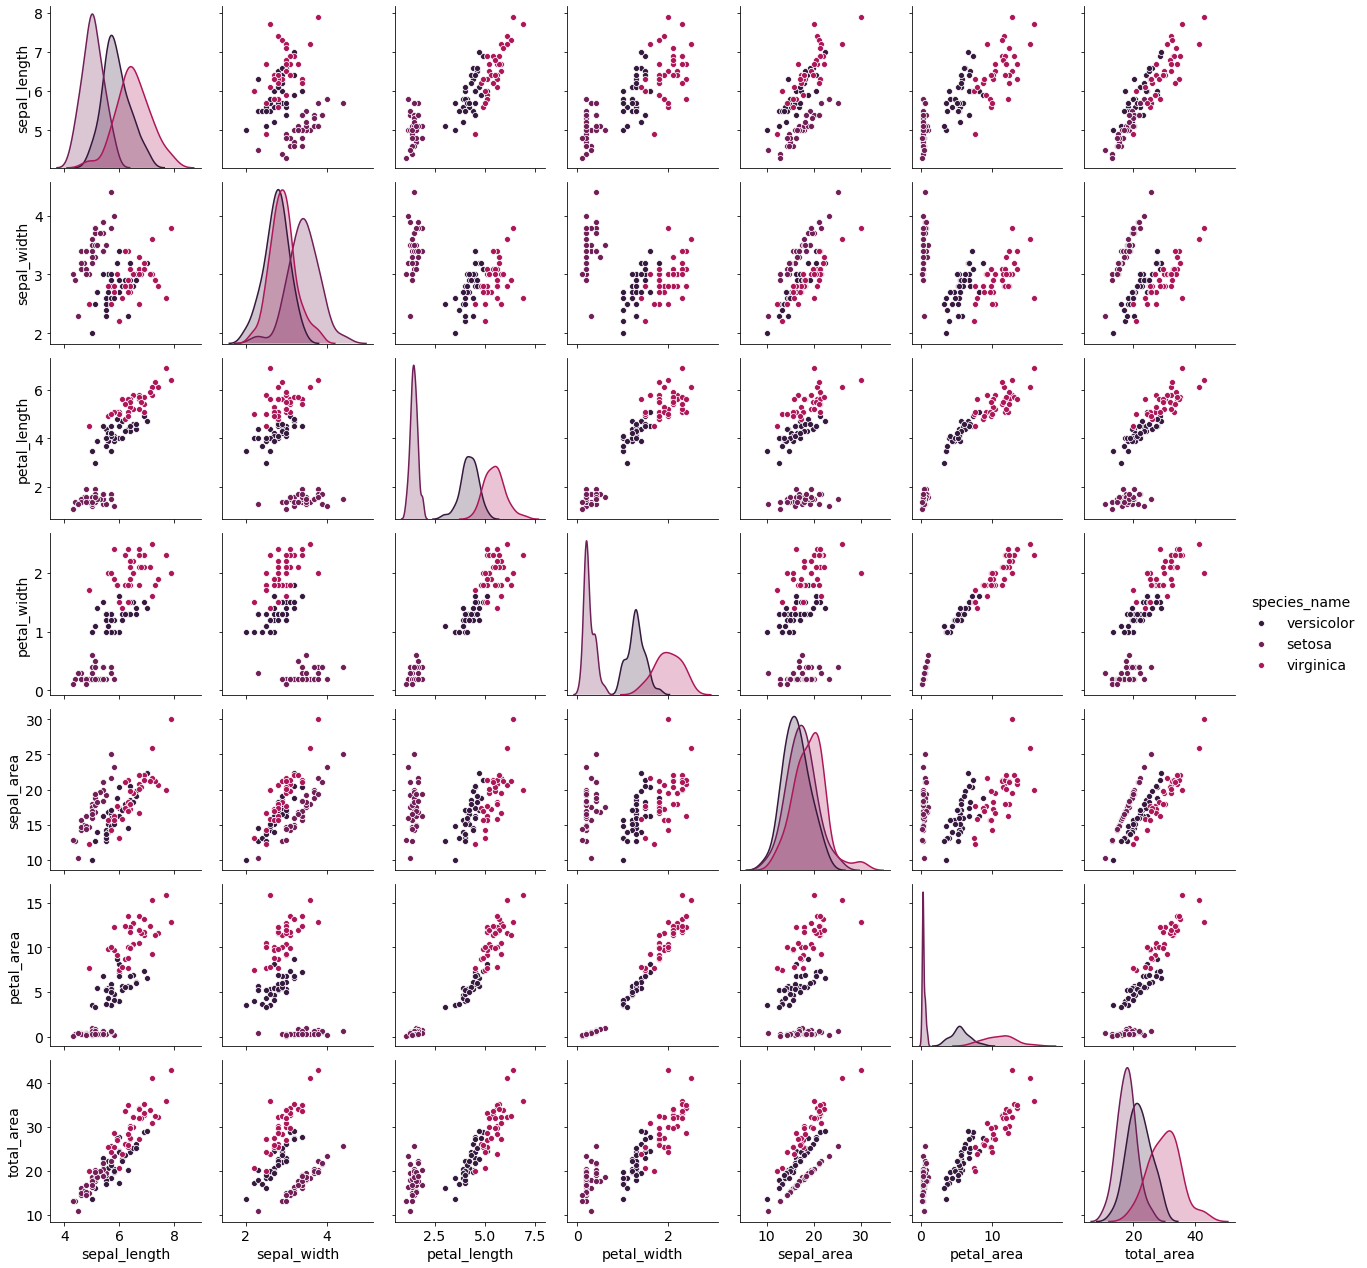

In [42]:
sns.set_palette("rocket")
sns.pairplot(train, hue="species_name")

In [48]:
import scipy.stats as stats
virginica = train[train.species_name == 'virginica']
versicolor= train[train.species_name == 'versicolor']

In [49]:
virginica.sepal_length.var(), versicolor.sepal_length.var()

(0.3838151260504202, 0.22793277310924376)

In [52]:
t, p = stats.ttest_ind(
    virginica.sepal_length,
    versicolor.sepal_length,)
print('t=', t, 'p=', p)
print("Therefore we reject the null hypothesis.")

t= 4.689639600247356 p= 1.364082860373532e-05


Everything up-to-date
